# **Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, ConfusionMatrixDisplay
import ipywidgets as widgets
from IPython.display import display
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **Mounting Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/CASE STUDY

/content/drive/MyDrive/CASE STUDY


# **Loading Dataset**

In [5]:
df=pd.read_csv("diabetes_prediction_dataset.csv")
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
diabetes_patients = df[df['diabetes'] == 1]
diabetes_patients.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
55,Male,50.0,0,0,former,37.16,9.0,159,1
59,Female,67.0,0,0,never,63.48,8.8,155,1
81,Male,57.0,0,0,No Info,27.32,8.2,126,1
87,Female,36.0,0,0,current,32.27,6.2,220,1
94,Female,60.0,0,0,never,27.32,7.5,300,1


# **Data Preprocessing**

In [7]:
df.shape

(100000, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:

df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [11]:
df['hypertension'].unique()

array([0, 1])

In [13]:
df['heart_disease'].unique()

array([1, 0])

In [12]:
sorted(df['bmi'].unique())

[10.01,
 10.08,
 10.14,
 10.19,
 10.21,
 10.3,
 10.34,
 10.4,
 10.5,
 10.59,
 10.6,
 10.62,
 10.64,
 10.69,
 10.76,
 10.77,
 10.86,
 10.89,
 10.91,
 10.98,
 11.0,
 11.01,
 11.05,
 11.08,
 11.09,
 11.1,
 11.16,
 11.2,
 11.24,
 11.25,
 11.28,
 11.31,
 11.34,
 11.36,
 11.38,
 11.39,
 11.4,
 11.43,
 11.44,
 11.47,
 11.51,
 11.53,
 11.55,
 11.56,
 11.65,
 11.69,
 11.74,
 11.75,
 11.82,
 11.85,
 11.88,
 11.9,
 11.91,
 11.93,
 11.94,
 11.95,
 11.97,
 11.98,
 11.99,
 12.0,
 12.03,
 12.05,
 12.08,
 12.1,
 12.12,
 12.13,
 12.14,
 12.15,
 12.16,
 12.21,
 12.22,
 12.25,
 12.26,
 12.29,
 12.3,
 12.32,
 12.33,
 12.36,
 12.37,
 12.38,
 12.39,
 12.4,
 12.41,
 12.46,
 12.47,
 12.48,
 12.5,
 12.53,
 12.58,
 12.6,
 12.62,
 12.63,
 12.64,
 12.65,
 12.66,
 12.67,
 12.68,
 12.69,
 12.7,
 12.71,
 12.72,
 12.73,
 12.74,
 12.75,
 12.77,
 12.78,
 12.79,
 12.8,
 12.82,
 12.84,
 12.85,
 12.86,
 12.88,
 12.89,
 12.9,
 12.91,
 12.92,
 12.93,
 12.94,
 12.95,
 12.96,
 12.97,
 12.98,
 12.99,
 13.01,
 13.02,
 13.03,
 1

In [14]:
sorted(df['HbA1c_level'].unique())

[3.5,
 4.0,
 4.5,
 4.8,
 5.0,
 5.7,
 5.8,
 6.0,
 6.1,
 6.2,
 6.5,
 6.6,
 6.8,
 7.0,
 7.5,
 8.2,
 8.8,
 9.0]

In [15]:
sorted(df['blood_glucose_level'].unique())

[80,
 85,
 90,
 100,
 126,
 130,
 140,
 145,
 155,
 158,
 159,
 160,
 200,
 220,
 240,
 260,
 280,
 300]

In [16]:
df['diabetes'].unique()

array([0, 1])

In [17]:
df['age'].describe()

,age
count,100000.000000
mean,41.885856
std,22.516840
min,0.080000
25%,24.000000
50%,43.000000
75%,60.000000
max,80.000000


In [18]:
df.diabetes.value_counts()

,count
diabetes,
0,91500
1,8500


In [19]:
sorted(df['age'].unique())

[0.08,
 0.16,
 0.24,
 0.32,
 0.4,
 0.48,
 0.56,
 0.64,
 0.72,
 0.8,
 0.88,
 1.0,
 1.08,
 1.16,
 1.24,
 1.32,
 1.4,
 1.48,
 1.56,
 1.64,
 1.72,
 1.8,
 1.88,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0]

# **categorical Encoding**

In [20]:
df.gender.value_counts()

,count
gender,
Female,58552
Male,41430
Other,18


In [21]:
df = df[df['gender']!='Other']
df.replace({'Female':0,'Male':1},inplace=True)
df.gender.value_counts()

<ipython-input-21-239acb73072d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Female':0,'Male':1},inplace=True)


,count
gender,
0,58552
1,41430


# **One Hot Encoding**

In [22]:
df.smoking_history.value_counts()

,count
smoking_history,
No Info,35810
never,35092
former,9352
current,9286
not current,6439
ever,4003


In [23]:
df.replace({'ever':'never'},inplace = True)
df.replace({'not current':'former'},inplace = True)

In [24]:
df = df[df['smoking_history'] != 'No Info']
df.smoking_history.value_counts()

,count
smoking_history,
never,39095
former,15791
current,9286


In [25]:
df = pd.get_dummies(df, columns=['smoking_history'], prefix='smoking_history').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64172 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   gender                   64172 non-null  int64
 1   age                      64172 non-null  int64
 2   hypertension             64172 non-null  int64
 3   heart_disease            64172 non-null  int64
 4   bmi                      64172 non-null  int64
 5   HbA1c_level              64172 non-null  int64
 6   blood_glucose_level      64172 non-null  int64
 7   diabetes                 64172 non-null  int64
 8   smoking_history_current  64172 non-null  int64
 9   smoking_history_former   64172 non-null  int64
 10  smoking_history_never    64172 non-null  int64
dtypes: int64(11)
memory usage: 5.9 MB


In [26]:
df.head(5)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_former,smoking_history_never
0,0,80,0,1,25,6,140,0,0,0,1
2,1,28,0,0,27,5,158,0,0,0,1
3,0,36,0,0,23,5,155,0,1,0,0
4,1,76,1,1,20,4,155,0,1,0,0
5,0,20,0,0,27,6,85,0,0,0,1


In [27]:
df.tail()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_former,smoking_history_never
99992,0,26,0,0,34,6,160,0,0,0,1
99993,0,40,0,0,40,3,155,0,0,0,1
99997,1,66,0,0,27,5,155,0,0,1,0
99998,0,24,0,0,35,4,100,0,0,0,1
99999,0,57,0,0,22,6,90,0,1,0,0


# **Balancing Data**

In [28]:
df_0_class = df[df['diabetes']==0]
df_1_class = df[df['diabetes']==1]
df_0_sample = df_0_class.sample(n=7046,random_state=42)
balanced_df = pd.concat([df_0_sample,df_1_class])
balanced_clean_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [29]:
df.diabetes.value_counts()

,count
diabetes,
0,57126
1,7046


In [30]:
balanced_clean_df.diabetes.value_counts()

,count
diabetes,
1,7046
0,7046


Text(0.5, 1.0, 'diabetes')

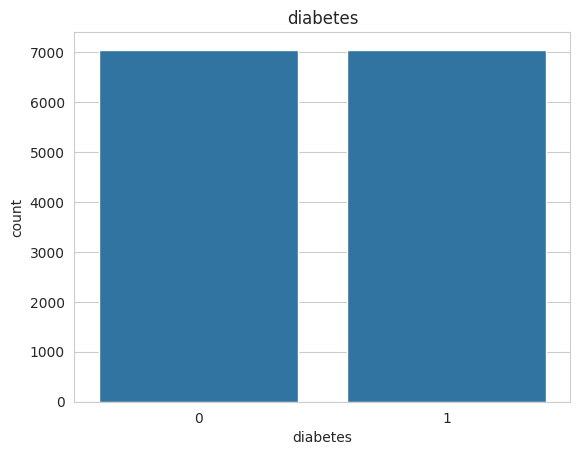

In [31]:
sns.set_style('whitegrid')
sns.countplot(data=balanced_clean_df,x='diabetes')
plt.title("diabetes")

# **Data Visualization**

<Axes: >

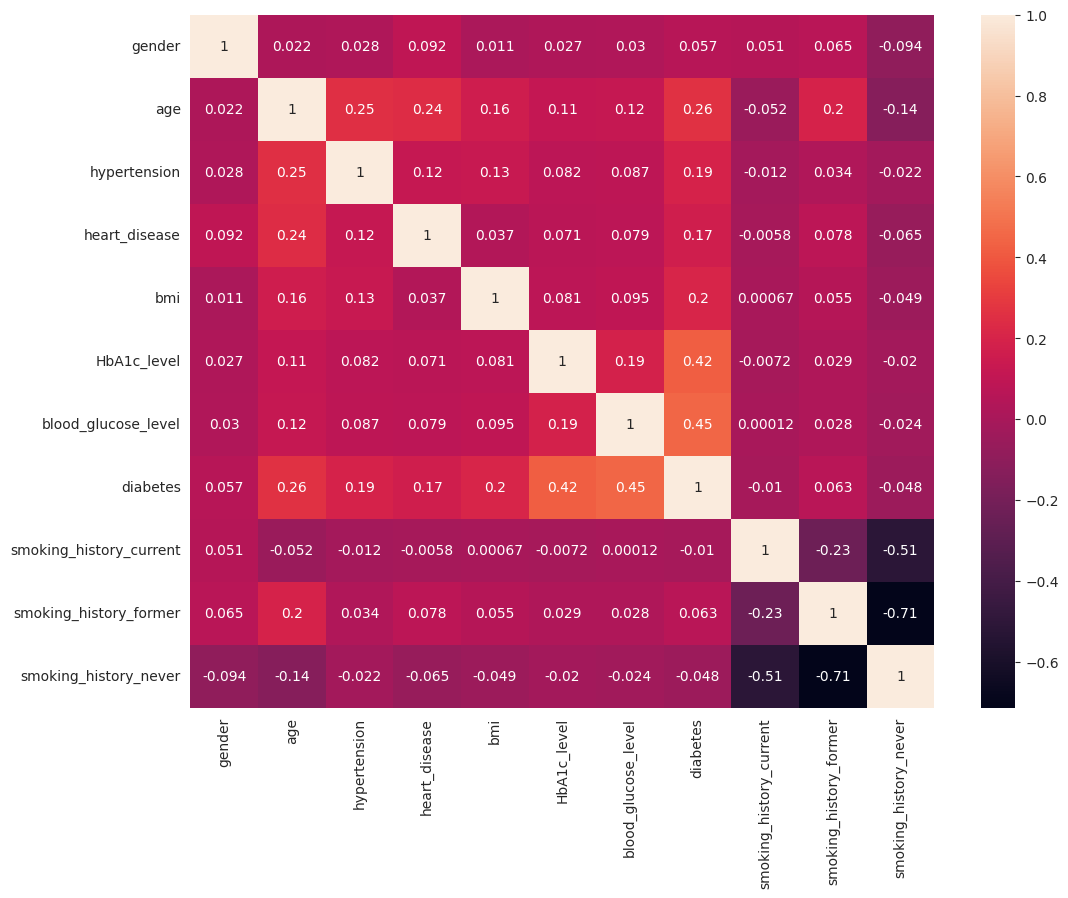

In [32]:
plt.figure(figsize=(12,9))
corr = df.corr()
sns.heatmap(corr,annot=True)

In [33]:
df.nunique()

,0
gender,2
age,81
hypertension,2
heart_disease,2
bmi,70
HbA1c_level,7
blood_glucose_level,18
diabetes,2
smoking_history_current,2
smoking_history_former,2


Text(0.5, 1.0, 'Gender')

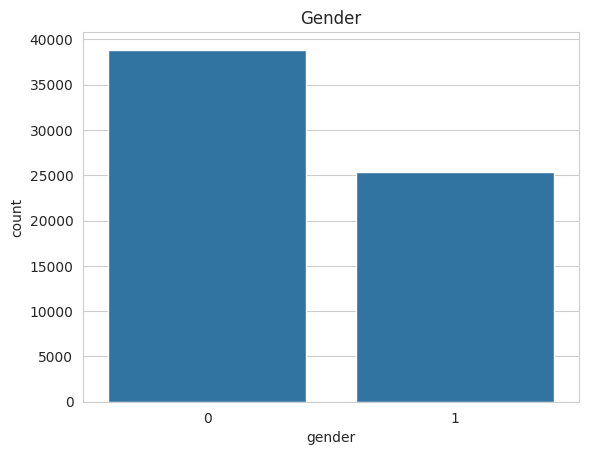

In [34]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='gender')
plt.title("Gender")

Text(0.5, 1.0, 'smoking_history_never')

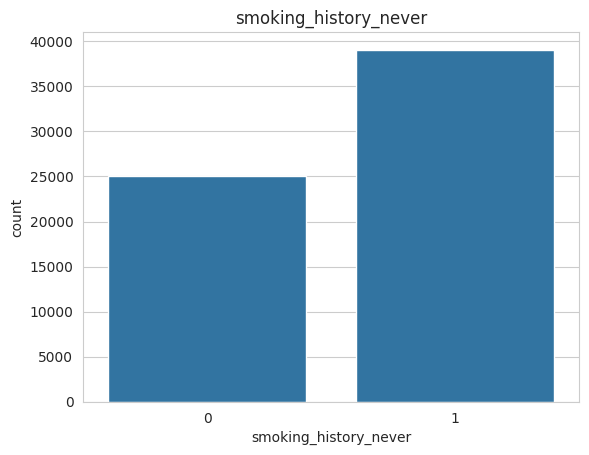

In [35]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='smoking_history_never')
plt.title("smoking_history_never")

Text(0.5, 1.0, 'smoking_history_former')

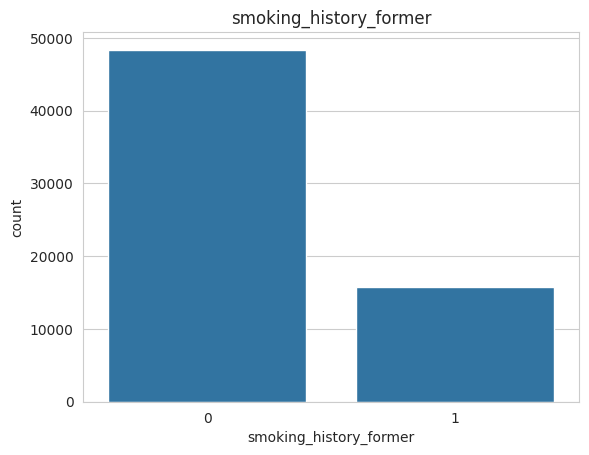

In [36]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='smoking_history_former')
plt.title("smoking_history_former")

Text(0.5, 1.0, 'smoking_history_current')

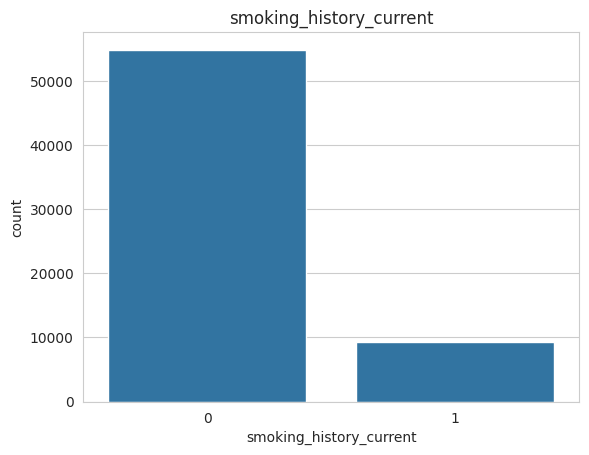

In [37]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='smoking_history_current')
plt.title("smoking_history_current")

Text(0.5, 1.0, 'Gender Vs Diabetes')

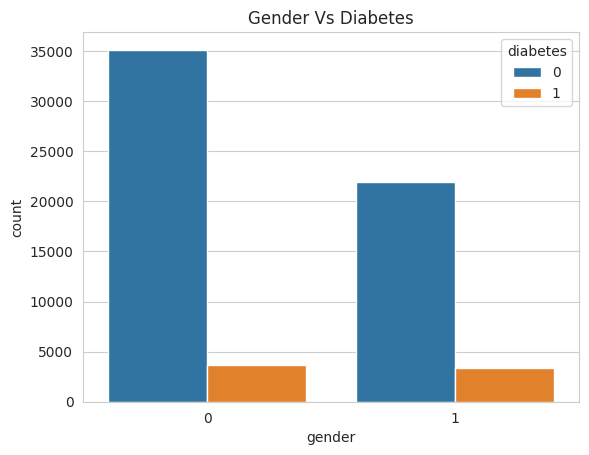

In [38]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='gender',hue='diabetes')
plt.title("Gender Vs Diabetes")

Text(0.5, 1.0, 'smoking_history_never Vs Diabetes')

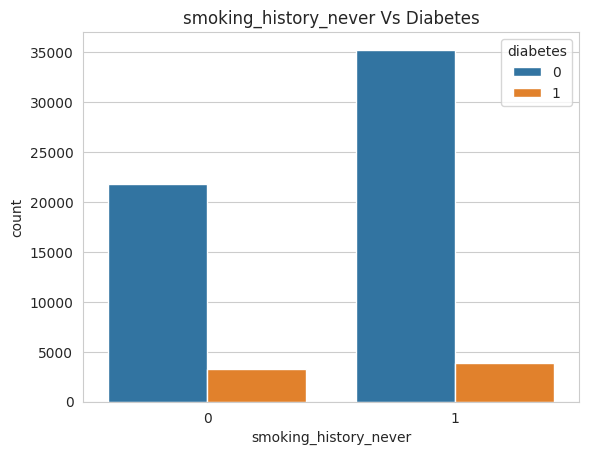

In [39]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='smoking_history_never',hue='diabetes')
plt.title("smoking_history_never Vs Diabetes")

Text(0.5, 1.0, 'smoking_history_former Vs Diabetes')

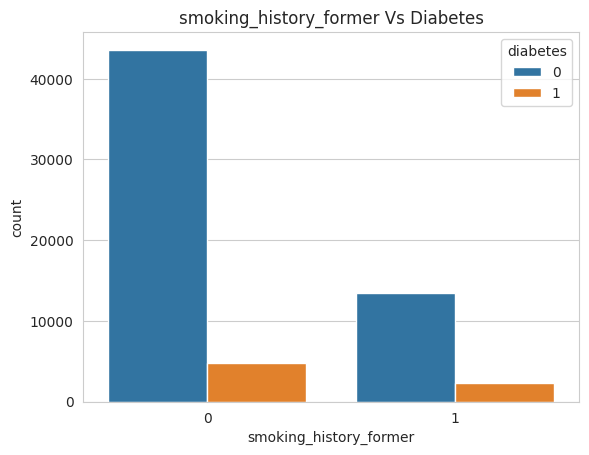

In [40]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='smoking_history_former',hue='diabetes')
plt.title("smoking_history_former Vs Diabetes")

Text(0.5, 1.0, 'smoking_history_current Vs Diabetes')

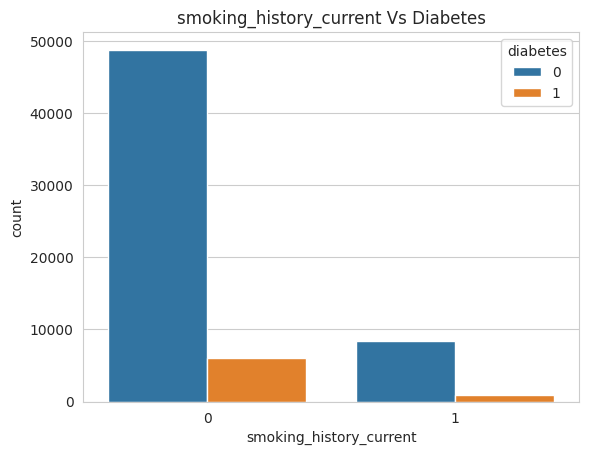

In [41]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='smoking_history_current',hue='diabetes')
plt.title("smoking_history_current Vs Diabetes")

Text(0.5, 1.0, 'HbA1c_level Vs Diabetes')

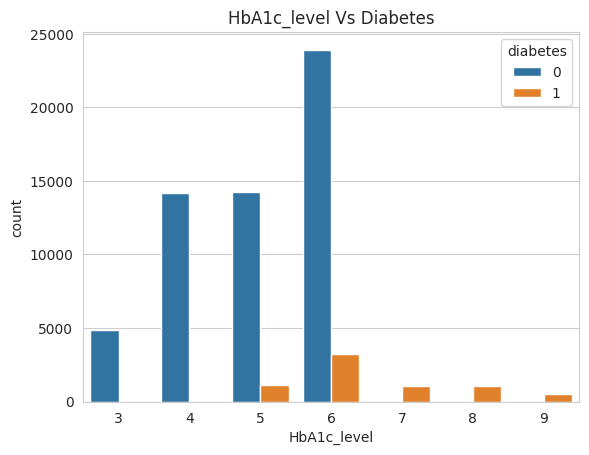

In [42]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='HbA1c_level',hue='diabetes')
plt.title("HbA1c_level Vs Diabetes")

Text(0.5, 1.0, 'blood_glucose_level Vs Diabetes')

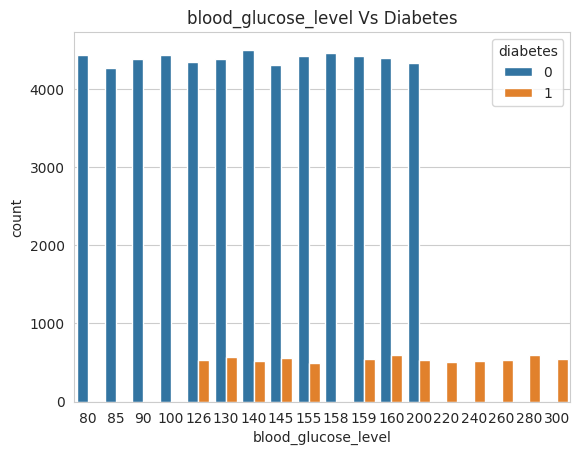

In [43]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='blood_glucose_level',hue='diabetes')
plt.title("blood_glucose_level Vs Diabetes")

boxplot Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Age')

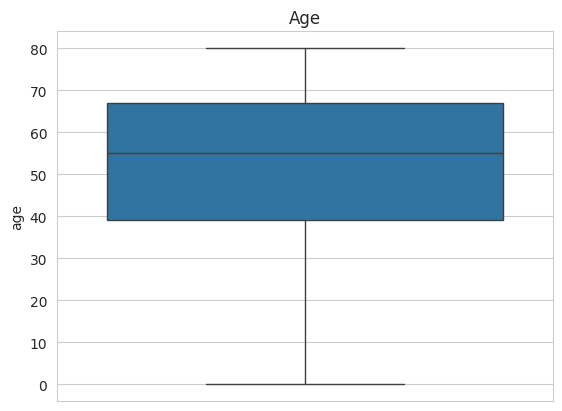

In [44]:
 print('boxplot',sns.boxplot(balanced_clean_df['age']))
 plt.title("Age")

boxplot Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'bmi')

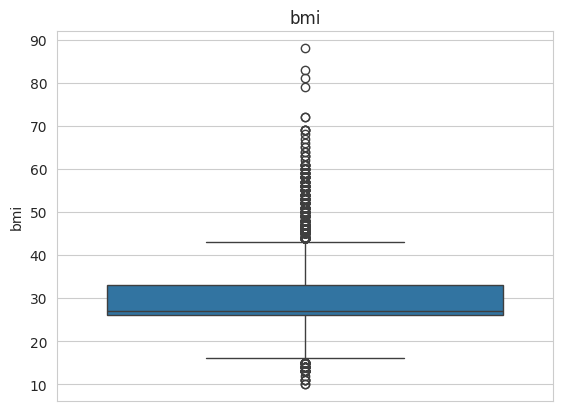

In [45]:
print('boxplot',sns.boxplot(balanced_clean_df['bmi']))
plt.title("bmi")

boxplot Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'HbA1c_level')

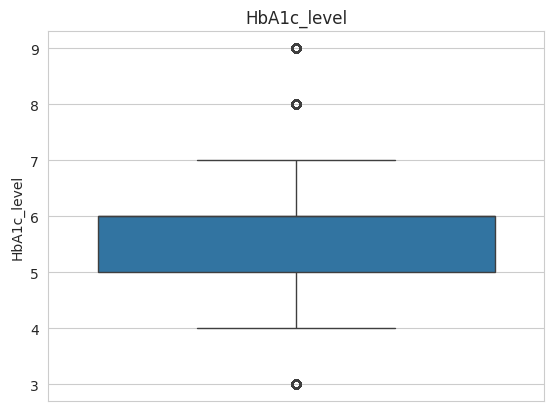

In [46]:
 print('boxplot',sns.boxplot(balanced_clean_df['HbA1c_level']))
 plt.title("HbA1c_level")

boxplot Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'blood_glucose_level')

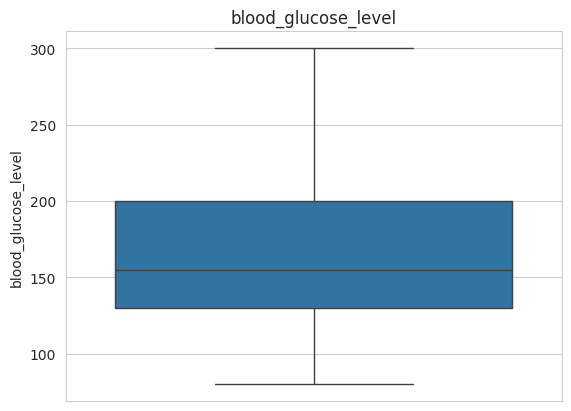

In [47]:
 print('boxplot',sns.boxplot(balanced_clean_df['blood_glucose_level']))
 plt.title("blood_glucose_level")

**bmi,HbA1c_level Have outliers**

# **Remove outliers**

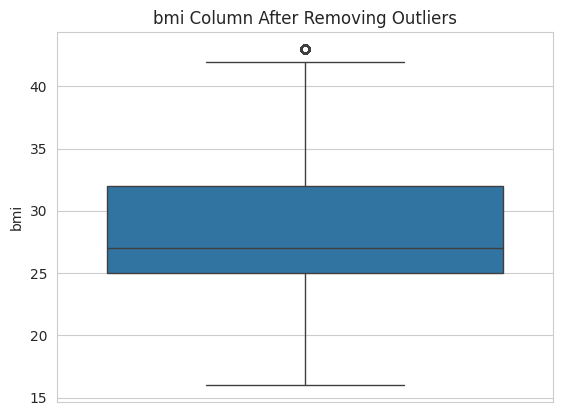

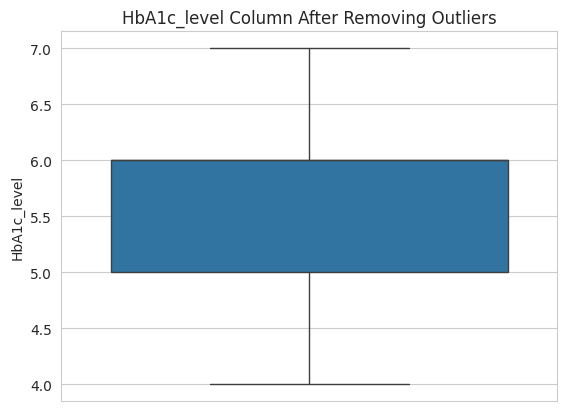

In [48]:
def remove_outliers_and_visualize(df, column_names):
    clean_data = df.copy()
    for col in column_names:
        Q1 = clean_data[col].quantile(0.25)
        Q3 = clean_data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_mask = (clean_data[col] < lower_bound) | (clean_data[col] > upper_bound)
        clean_data = clean_data[~outlier_mask]

        plt.figure()
        sns.boxplot(y=clean_data[col], orient='v')
        plt.title(f'{col} Column After Removing Outliers')
        plt.show()

    return clean_data
clean_data = remove_outliers_and_visualize(balanced_clean_df, ['bmi', 'HbA1c_level'])

# **Feature Engineering**

In [49]:
x=balanced_clean_df.drop('diabetes',axis=1)
y=balanced_clean_df.diabetes

x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=10,test_size=0.25)

In [50]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [51]:
print(x)

       gender  age  hypertension  heart_disease  bmi  HbA1c_level  \
0           0   63             1              1   46            8   
1           0   62             1              0   40            3   
2           1   56             0              1   30            7   
3           0   31             0              0   40            5   
4           1   47             0              0   27            4   
...       ...  ...           ...            ...  ...          ...   
14087       1   34             0              0   26            6   
14088       0   63             1              0   27            6   
14089       1   79             0              0   22            6   
14090       1   31             0              0   24            6   
14091       0   55             1              0   42            7   

       blood_glucose_level  smoking_history_current  smoking_history_former  \
0                      220                        0                       1   
1            

In [52]:
print(y)

0        1
1        0
2        1
3        0
4        0
        ..
14087    0
14088    1
14089    0
14090    0
14091    1
Name: diabetes, Length: 14092, dtype: int64


# **Training using differnt Models**

In [53]:
model = LGBMClassifier()
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5255, number of negative: 5314
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 182
[LightGBM] [Info] Number of data points in the train set: 10569, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497209 -> initscore=-0.011165
[LightGBM] [Info] Start training from score -0.011165


LGBMClassifier()

In [54]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print('The Accuracy is:',accuracy*100,'%')

The Accuracy is: 89.78143627590121 %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [55]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('The Accuracy is:',accuracy*100,'%')

The Accuracy is: 88.73119500425773 %


In [56]:
model = GradientBoostingClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print('The Accuracy is:',accuracy*100,'%')

The Accuracy is: 90.49105875674141 %


In [57]:
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print('The Accuracy is:',accuracy*100,'%')

The Accuracy is: 87.76610843031507 %


In [59]:
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print('The Accuracy is:',accuracy*100,'%')

The Accuracy is: 87.51064433721261 %


# **Model Training**

In [60]:
model = GradientBoostingClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# **Model Evaluation**

The Accuracy is: 90.49105875674141 %
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1732
           1       0.89      0.92      0.91      1791

    accuracy                           0.90      3523
   macro avg       0.91      0.90      0.90      3523
weighted avg       0.91      0.90      0.90      3523

Confusion Matrix:
[[1535  197]
 [ 138 1653]]


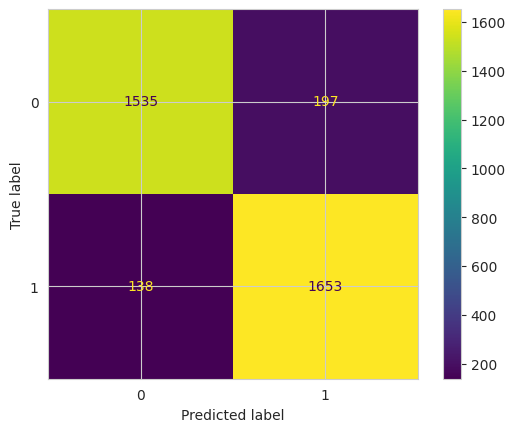

In [61]:
accuracy = accuracy_score(y_test, y_pred)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

print('The Accuracy is:',accuracy*100,'%')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

In [62]:
def predict_diabetes(input_data):
    input_df = pd.DataFrame(input_data, index=[0])
    input_df = pd.get_dummies(input_df, columns=['smoking_history'], prefix='smoking_history').astype(int)
    for col in x.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    input_df = input_df[x.columns]
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    return 'The Person is Diabetic' if prediction[0] == 1 else 'The person is Not Diabetic'
new_data = {
    'age': 56,
    'gender': 1,  # 1 for Male, 0 for Female
    'hypertension': 1,
    'heart_disease': 0,
    'smoking_history': 'current',  # Use the correct processed value
    'bmi': 27.25,
    'HbA1c_level': 6.6,
    'blood_glucose_level': 200}

prediction = predict_diabetes(new_data)
print(prediction)

The Person is Diabetic


# **Interface**

In [63]:
def predict_diabetes(input_data):
    input_df = pd.DataFrame(input_data, index=[0])
    input_df = pd.get_dummies(input_df, columns=['smoking_history'], prefix='smoking_history').astype(int)
    for col in x.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    input_df = input_df[x.columns]
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    return 'The Person is Diabetic' if prediction[0] == 1 else 'The person is Not Diabetic'

age_widget = widgets.Text(description='Age')
gender_widget = widgets.RadioButtons(options=['Female', 'Male'], description='Gender')
hypertension_widget = widgets.Checkbox(description='Hypertension')
heart_disease_widget = widgets.Checkbox(description='Heart Disease')
smoking_history_widget = widgets.RadioButtons(options=['never', 'former', 'current'], description='Smoking History')
bmi_widget = widgets.Text(description='BMI')
hba1c_level_widget = widgets.Text(description='HbA1c Level')
blood_glucose_level_widget = widgets.Text(description='Blood Glucose Level')

output_widget = widgets.Output()

def on_predict_button_clicked(b):
    with output_widget:
        output_widget.clear_output()
        input_data = {
            'age': age_widget.value,
            'gender': 1 if gender_widget.value == 'Male' else 0,  # Encode gender
            'hypertension': 1 if hypertension_widget.value else 0,
            'heart_disease': 1 if heart_disease_widget.value else 0,
            'smoking_history': smoking_history_widget.value,
            'bmi': bmi_widget.value,
            'HbA1c_level': hba1c_level_widget.value,
            'blood_glucose_level': blood_glucose_level_widget.value
        }
        prediction = predict_diabetes(input_data)
        print(f'Prediction: {prediction}')

predict_button = widgets.Button(description='Predict')
predict_button.on_click(on_predict_button_clicked)

input_widgets = widgets.VBox([
    age_widget, gender_widget, hypertension_widget, heart_disease_widget,
    smoking_history_widget, bmi_widget, hba1c_level_widget, blood_glucose_level_widget,
    predict_button
])
display(input_widgets)
display(output_widget)

Output()

# **Samples for testing**

**Without Diabetes**

In [65]:
# gender	age	 hypertension	 heart_disease	bmi	 HbA1c_level	blood_glucose_level		smoking_history	      diabetes
#  1      28        0             0         27      5                 158                  never              0
#  0      36        0             0         23      5                 155                  current            0
#  1      76        1             1         20      4                 155                  current            0
#  0      20        0             0         27      6                 85                   never              0
#  0      57        0             0         22      6                 90                   current            0

**With Diabetes**

In [66]:
# gender	age	 hypertension	 heart_disease	bmi	 HbA1c_level	blood_glucose_level		smoking_history    diabetes
#   1      67     0               1         27       6                200                  never            1
#   1      50     1               0         27       5                200                  current          1
#   0      53     0               0         27       7                159                  former           1
#   0      60     0               0         27       7                300                  never            1
#   1      50     1               0         27       5                260                  current          1